In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [3]:
iris = load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [24]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [12]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
X.shape

(150, 4)

In [14]:
y.shape

(150,)

使用PCA降维

In [16]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
X_rd = pca.transform(X)

In [18]:
X_rd.shape

(150, 2)

In [26]:
np.unique(y)

array([0, 1, 2])

绘制降维后的图像

Text(0.5, 1.0, 'PCA of iris data')

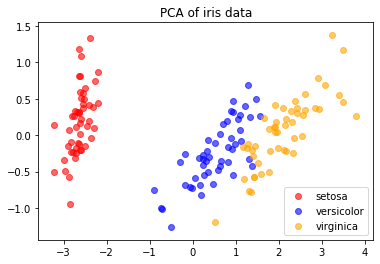

In [29]:
colors = ['red','blue','orange']
plt.figure()
for y_value in np.unique(y):
    plt.scatter(X_rd[y == y_value,0], X_rd[y == y_value, 1], alpha=0.6, c=colors[y_value], label = iris.target_names[y_value])
plt.legend()
plt.title("PCA of iris data")

In [30]:
# 查看前n个主成分的方差
pca.explained_variance_

array([4.22824171, 0.24267075])

In [31]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [32]:
# 查看两个主成分
# 2行对应于提取出的两个主成分，4对应于原有的4个特征
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [33]:
pca.components_.shape

(2, 4)

利用PCA降维探索人脸数据集

In [34]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

In [36]:
type(faces)

sklearn.utils.Bunch

In [37]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

faces里是1348张人脸图片，存储在images里，每张图片是62*47个像素大小
data里有1348行，对应于1348张图片，每张图片在这里被拉成了一个行向量

In [39]:
faces.data.shape

(1348, 2914)

In [41]:
faces.images.shape

(1348, 62, 47)

In [42]:
62*47

2914

可视化原有图像

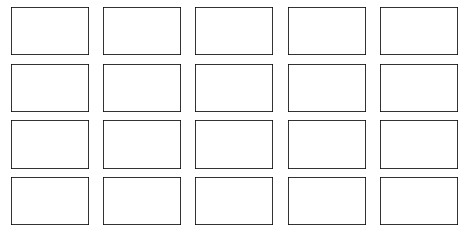

In [43]:
fig, axes = plt.subplots( nrows=4, ncols=5, figsize = (8,4), subplot_kw={"xticks":[], "yticks":[]})

In [46]:
type(axes)

numpy.ndarray

In [47]:
axes.shape

(4, 5)

In [49]:
axes.flat

In [50]:
enumerate(axes.flat)

In [52]:
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i,:,:], cmap = 'gray')

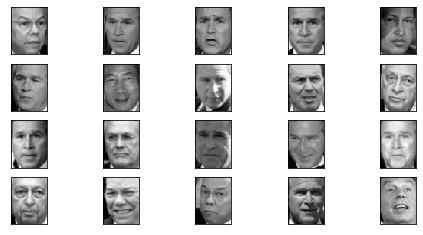

In [53]:
fig

建模降维

In [54]:
# 原本的数据有2914维（data里的），现在降到150维
pca = PCA(n_components=150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [80]:
components = pca.components_
data_rd = pca.transform(faces.data)
data_reverse = pca.inverse_transform(data_rd)

In [81]:
faces.data.shape

(1348, 2914)

In [82]:
components.shape

(150, 2914)

In [83]:
data_rd.shape

(1348, 150)

In [84]:
data_reverse.shape

(1348, 2914)

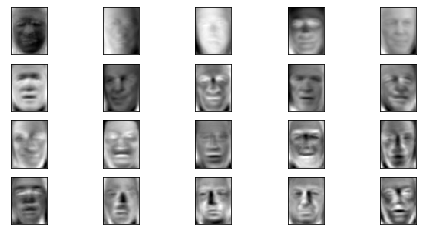

In [79]:
fig, axes = plt.subplots( nrows=4, ncols=5, figsize = (8,4), subplot_kw={"xticks":[], "yticks":[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(components[i,:].reshape(62,47), cmap = 'gray')

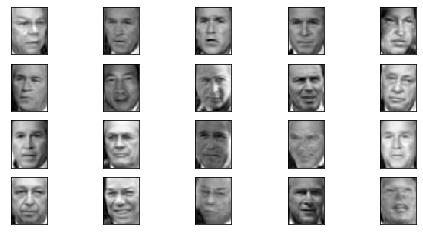

In [85]:
fig, axes = plt.subplots( nrows=4, ncols=5, figsize = (8,4), subplot_kw={"xticks":[], "yticks":[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(data_reverse[i,:].reshape(62,47), cmap = 'gray')